# Plotting using rasterio

In [1]:
import rasterio
import rasterio.plot
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_nb        = '99'

data_path = f'{computer_path}data/'


single_band_image = f'{data_path}NDVI/T31UFS_20200719T105031_NDVI.tif'

multi_band_image = f'{data_path}PLEIADE/IMG_PHR1B_MS_202204241047288_ORT_6321931101-2_R1C1.TIF'

## Plotting single band image

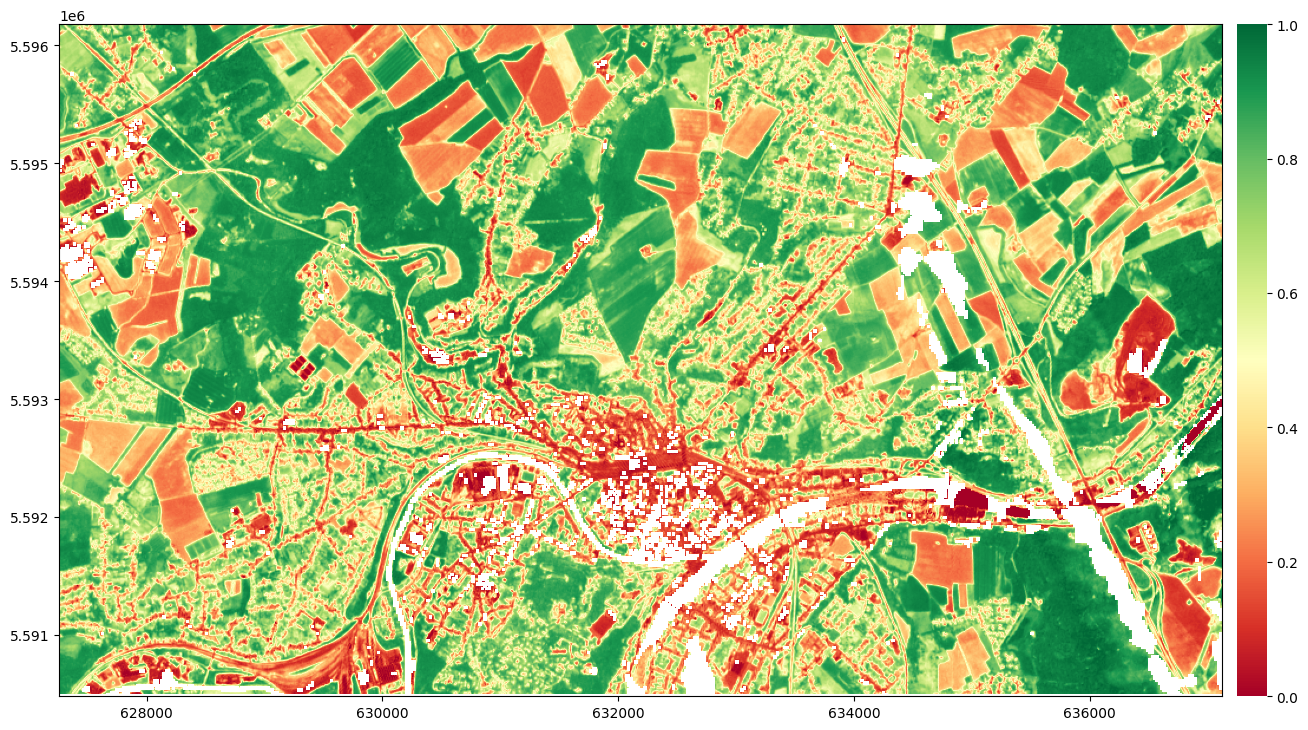

In [3]:
# Create a figure object
fig, ax = plt.subplots(1, 1, figsize=(15,15))

# Open image with rasterio
src = rasterio.open(single_band_image, "r")

# Get color map with matplotlib
color_map = plt.cm.get_cmap("RdYlGn")
reversed_color_map = color_map.reversed()

# Plot image
im_rio = rasterio.plot.show(src,
                            cmap=color_map,
                            vmin=0,
                            vmax=1,
                            ax=ax)

im_rio = im_rio.get_images()[0]

# Add color bar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im_rio, ax=ax, cax=cax)


plt.box(False)

## Plotting multi-band image

**Functions to normalize reflectances values**

Source : https://gis.stackexchange.com/questions/338074/plot-rgb-using-rasterio

In [16]:
def norm_min_max(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

def norm_p5_p95(band):
    band_p5  = np.percentile(band, 5)
    band_p95 = np.percentile(band, 95)
    
    return ((band - band_p5)/(band_p95 - band_p5))

def norm_user_defined(band, band_min, band_max):
    return ((band - band_min)/(band_max - band_min))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


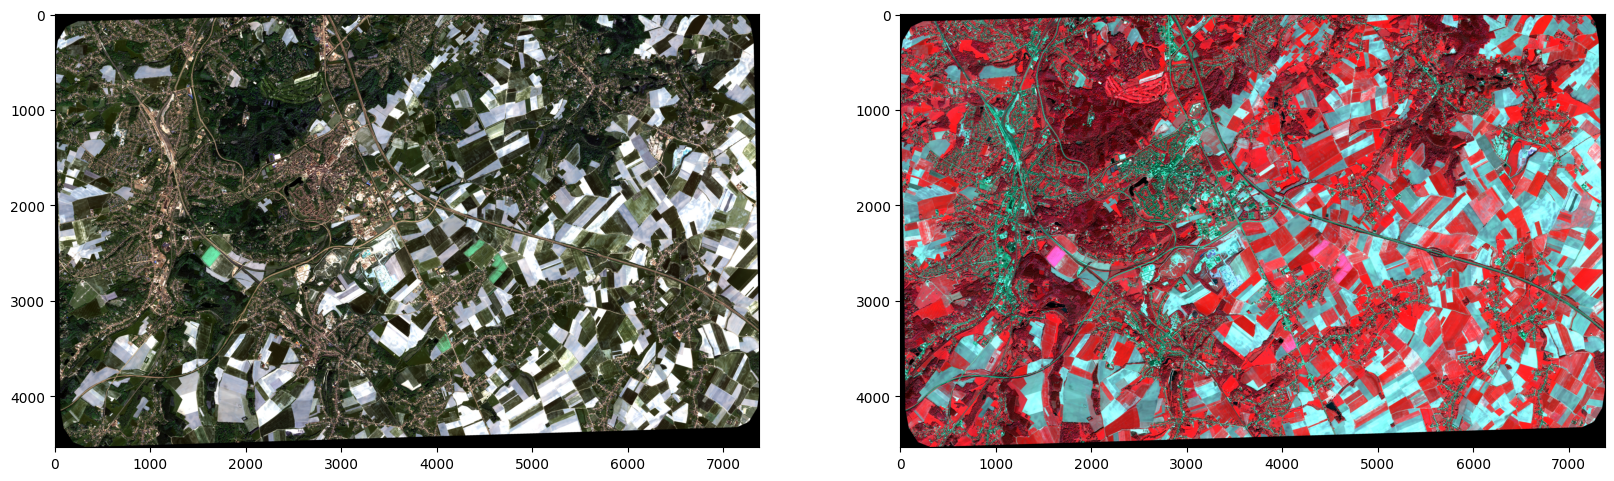

In [17]:
# Create a figure object
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

# Open image with rasterio
src = rasterio.open(multi_band_image, "r")

# Read image as Numpy array
image = src.read()

flag_p5_p95       = True   # Good contrast
flag_min_max      = False  # Less good contrast
flag_user_defined = False  # User-defined min/max value can be set to improve the constrast (you can find the right values by opening the image in QGIS)

if flag_p5_p95:
    blue  = norm_p5_p95(image[0].astype(float))  # Band 0 is blue band
    green = norm_p5_p95(image[1].astype(float))  # Band 1 is green band
    red   = norm_p5_p95(image[2].astype(float))  # band 2 is red band
    nir   = norm_p5_p95(image[3].astype(float))  # band 3 is NIR band

if flag_min_max:
    blue  = norm_min_max(image[0].astype(float))  # Band 0 is blue band
    green = norm_min_max(image[1].astype(float))  # Band 1 is green band
    red   = norm_min_max(image[2].astype(float))  # band 2 is red band
    nir   = norm_min_max(image[3].astype(float))  # band 3 is NIR band

if flag_user_defined:
    blue  = norm_user_defined(image[0].astype(float),0,2200)  # Band 0 is blue band
    green = norm_user_defined(image[1].astype(float),0,1800)  # Band 1 is green band
    red   = norm_user_defined(image[2].astype(float),0,1400)  # band 2 is red band
    nir   = norm_user_defined(image[3].astype(float),0,3000)  # band 3 is NIR band


# Natural color map
# -----------------
# Red canal   = red band
# Green canal = green band
# Blue canal  = blue band
natural_color = np.dstack((red,green,blue))

ax1.imshow(natural_color)

# False color map
# ---------------
# Red canal   = NIR band
# Green canal = red band
# Blue canal  = green band
false_color   = np.dstack((nir,red,green))

ax2.imshow(false_color)